**<h1>Credit Card Fraud Detection</h1>**

 The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Analysing Dataset**

Importing Required libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading csv file
credit_card= pd.read_csv("creditcard.csv")
credit_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#columns present in the dataset
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
credit_card.shape

(284807, 31)

**Checking Whether null values present in the dataset**

In [6]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print("Fradulent Transactions : {}".format(credit_card[credit_card["Class"]==1]["Class"].count()))
print("Genuine Transactions : {}".format(credit_card[credit_card["Class"]==0]["Class"].count()))

Genuine Transactions : 492
Fradulent Transactions : 284315


**Data Summary**

In [8]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
credit_card.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

In [10]:
credit_card.corr()["Class"]

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

**Distribution of the data**

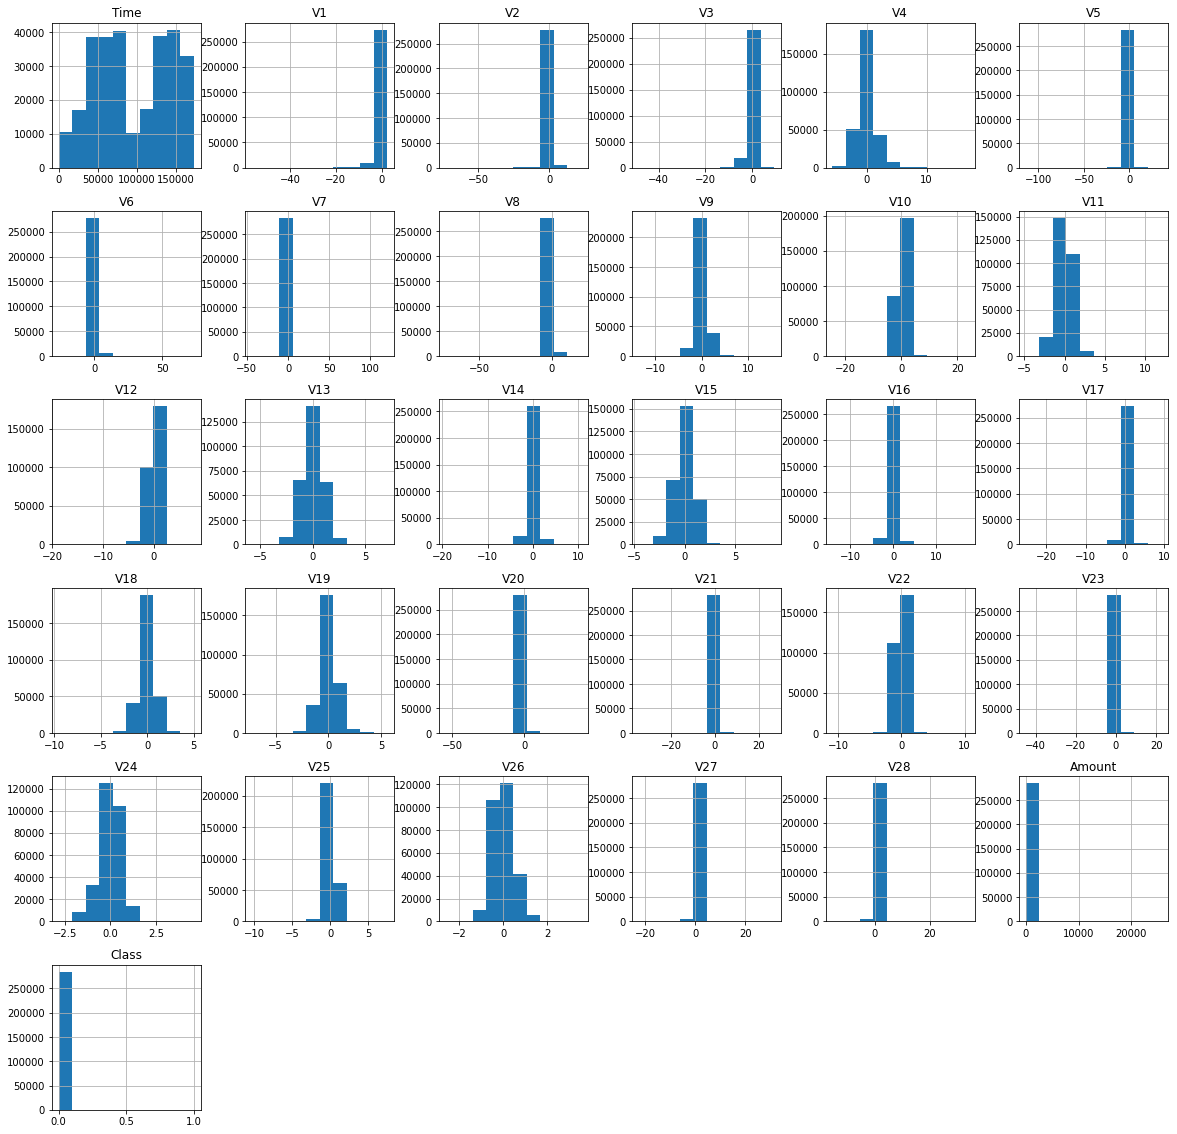

In [ ]:
credit_card.hist(figsize=(20,20))
plt.show()

In the given dataset,83% of the data contains genuine transaction and 17% contains fradulent transaction

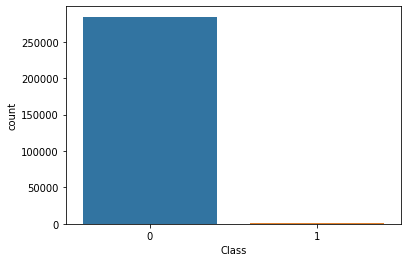

In [ ]:
sns.countplot(data=credit_card,x="Class")

In [ ]:
df = credit_card[["V10","V11","V12","Class"]]

In [ ]:
df.head()

,V10,V11,V12,Class
0,0.090794,-0.551600,-0.617801,0
1,-0.166974,1.612727,1.065235,0
2,0.207643,0.624501,0.066084,0
3,-0.054952,-0.226487,0.178228,0
4,0.753074,-0.822843,0.538196,0


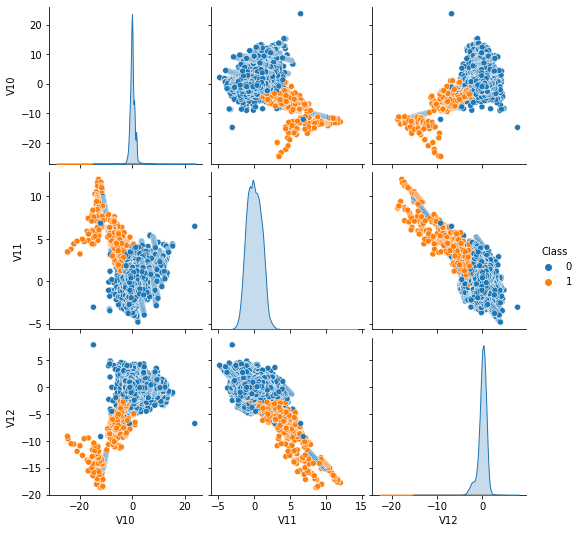

In [ ]:
sns.pairplot(df,hue="Class")

In [ ]:
df = credit_card[["V14","V15","V16","Class"]]

In [ ]:
df.head()

,V14,V15,V16,Class
0,-0.311169,1.468177,-0.470401,0
1,-0.143772,0.635558,0.463917,0
2,-0.165946,2.345865,-2.890083,0
3,-0.287924,-0.631418,-1.059647,0
4,-1.119670,0.175121,-0.451449,0


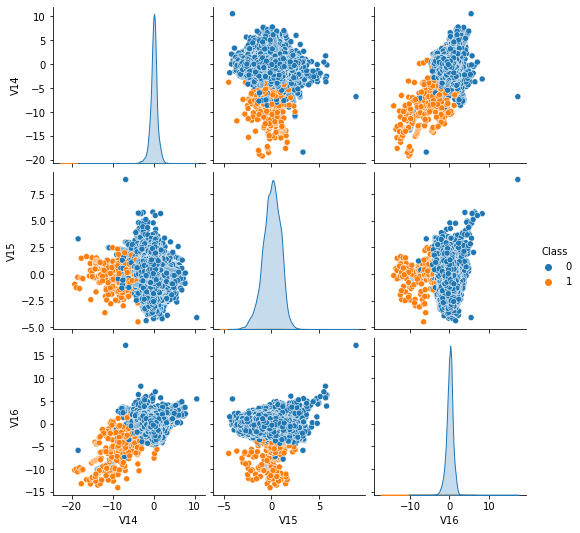

In [ ]:
sns.pairplot(df,hue="Class")

In [11]:
X = credit_card.drop("Class",axis=1)
y=credit_card["Class"]

In [12]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [50]:
outlier_fraction=(credit_card[credit_card["Class"]==1]["Class"].count())/len(credit_card)
print(outlier_fraction)


0.001727485630620034


**Fitting Classifiers on original dataset**

Algorithms used:

1.IsolationForest

2.RandomForest

**IsolationForest Algorithm**

-IsolationForest Algorithm is machine learning algorithm that is used to detect the anomlies in the data.Its an unsupervised algorithm and it works by isolating outliers from the inliers data points.

In [105]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve

In [52]:
clf = IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=0).fit(X)

In [106]:
y_pred = clf.predict(X)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
accuracy_score(y,y_pred)

0.9982725143693799

In [54]:
print(classification_report(y,y_pred,target_names=["Genuine","Fraud"]))

              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00    284315
       Fraud       0.33      0.33      0.33       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807



In [107]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6,random_state=0)
clf.fit(X,y)
y_pred_rand = clf.predict(X)
print(accuracy_score(y,y_pred_rand))

0.999568128592345


In [108]:
print(classification_report(y,y_pred_rand,target_names=["Genuine","Fraud"]))

              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00    284315
       Fraud       0.97      0.78      0.86       492

    accuracy                           1.00    284807
   macro avg       0.98      0.89      0.93    284807
weighted avg       1.00      1.00      1.00    284807



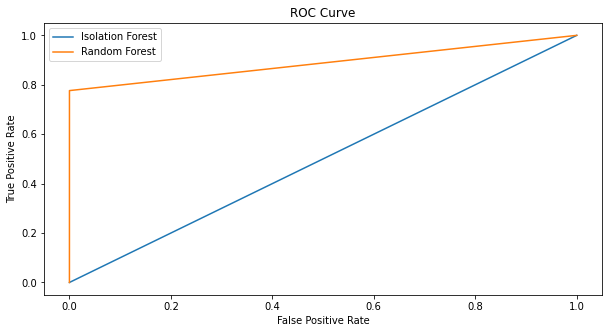

In [112]:
falpos,truepos,_=roc_curve(y,y_pred)
falpos_r,truepos_r,_ = roc_curve(y,y_pred_rand)
# plot the roc curve for the model
plt.plot(falpos,truepos,  label="Isolation Forest")
plt.plot(falpos_r,truepos_r,  label="Random Forest")


# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10,5)

# show the plot
plt.show()


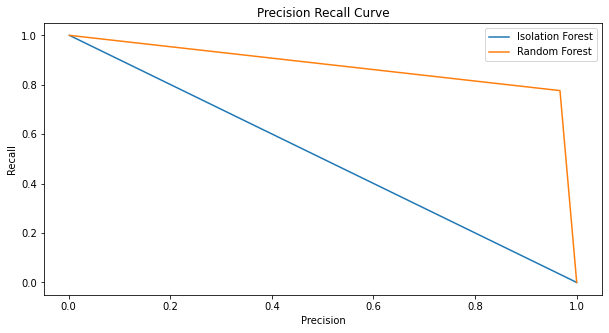

In [114]:
precision,recall,_=precision_recall_curve(y,y_pred)
precision_r,recall_r,_= precision_recall_curve(y,y_pred_rand)
# plot the roc curve for the model
plt.plot(precision,recall,  label="Isolation Forest")
plt.plot(precision_r,recall_r,  label="Random Forest")


# axis labels
plt.title('Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')

# show the legend
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10,5)

# show the plot
plt.show()

**Handling Imbalanced Dataset**

1.Oversampling

2.Undersampling

3.SMOTE ( oversampling negatives and undersampling positives)

SMOTE ANALYSIS

In [64]:
from collections import Counter
from imblearn.combine import SMOTETomek

#Implementing the technique
smk = SMOTETomek(random_state=0)

# fit and apply the transform
X_smote, y_smote = smk.fit_resample(X, y)

# view class distribution before and after SMOTE
print(Counter(y))
print(Counter(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 284315, 1: 492})
Counter({0: 283764, 1: 283764})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [72]:
df=pd.DataFrame(X_smote,columns=credit_card.columns[:-1])

In [73]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [74]:
df["Class"]=y_smote

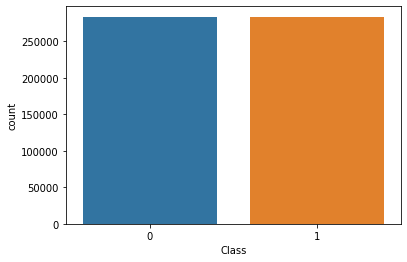

In [75]:
sns.countplot(data=df,x="Class")

In [76]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.261232,-0.237978,0.167804,-0.219624,0.305431,0.120745,0.238749,-0.144642,0.173689,0.231723,-0.327669,0.274174,-0.123608,0.185855,-0.162357,0.256450,0.259982,0.288636,-0.092244,-0.053043,-0.069372,0.137381,0.058408,0.001199,-0.226940,-0.052361,-0.155032,0.001727,0.017971,-0.145222
V1,0.261232,1.000000,-0.813129,0.887255,-0.625853,0.874794,0.339118,0.886960,-0.110886,0.658007,0.741825,-0.550347,0.601875,-0.077417,0.462018,0.130043,0.650634,0.687763,0.692625,-0.313853,-0.296313,-0.034318,0.012583,-0.047418,-0.061012,-0.124584,0.066448,0.154759,0.155710,-0.037703,-0.456713
V2,-0.237978,-0.813129,1.000000,-0.863492,0.684019,-0.803691,-0.301227,-0.857361,-0.003592,-0.688659,-0.769352,0.632232,-0.673012,0.058750,-0.575543,-0.178090,-0.655909,-0.659601,-0.640785,0.243601,0.305740,0.099627,-0.060087,0.141670,-0.003833,0.132057,-0.020289,-0.131682,-0.000072,-0.234767,0.528739
V3,0.167804,0.887255,-0.863492,1.000000,-0.779521,0.863116,0.478756,0.892130,-0.194785,0.762769,0.854725,-0.727534,0.765746,-0.099855,0.663443,0.160216,0.741607,0.750781,0.719902,-0.333201,-0.341297,-0.005221,-0.031691,-0.020321,0.007815,-0.119042,-0.004429,0.088436,0.122658,-0.007941,-0.595113
V4,-0.219624,-0.625853,0.684019,-0.779521,1.000000,-0.594719,-0.460342,-0.724273,0.117360,-0.796174,-0.819014,0.818762,-0.854725,0.082611,-0.814960,-0.133865,-0.760433,-0.743128,-0.674530,0.352521,0.289912,-0.003642,0.110724,0.020355,-0.076125,-0.014233,0.132771,-0.017198,-0.077108,-0.003795,0.743061
V5,0.305431,0.874794,-0.803691,0.863116,-0.594719,1.000000,0.339979,0.847853,-0.240058,0.662818,0.757441,-0.546742,0.624516,-0.149734,0.450810,0.099248,0.699369,0.752388,0.755199,-0.405216,-0.303796,0.003451,-0.042207,-0.044491,-0.126925,-0.130223,0.067083,0.156883,0.156608,-0.102364,-0.395340
V6,0.120745,0.339118,-0.301227,0.478756,-0.460342,0.339979,1.000000,0.295046,-0.590399,0.402634,0.443028,-0.502595,0.512702,-0.128520,0.533799,-0.038590,0.447191,0.448546,0.382875,-0.254717,-0.142903,0.077481,-0.058731,0.337657,-0.034962,-0.155875,-0.053329,-0.141394,-0.007204,0.155879,-0.422259
V7,0.238749,0.886960,-0.857361,0.892130,-0.724273,0.847853,0.295046,1.000000,0.068212,0.766617,0.869430,-0.661059,0.731081,-0.052435,0.563968,0.197943,0.765398,0.783345,0.777827,-0.364340,-0.357870,-0.024428,-0.062534,-0.117502,-0.035756,0.013258,0.034040,0.216310,0.144721,0.122347,-0.515080
V8,-0.144642,-0.110886,-0.003592,-0.194785,0.117360,-0.240058,-0.590399,0.068212,1.000000,-0.105219,-0.072125,0.160406,-0.165996,0.275920,-0.171415,0.153961,-0.167543,-0.227418,-0.189945,0.228708,0.032773,-0.217673,0.118236,-0.496592,0.102630,0.251318,0.050188,0.256481,-0.039575,0.023407,0.055742
V9,0.173689,0.658007,-0.688659,0.762769,-0.796174,0.662818,0.402634,0.766617,-0.105219,1.000000,0.856096,-0.716807,0.780468,-0.077631,0.694284,0.132712,0.755607,0.783216,0.735979,-0.377861,-0.375885,0.131302,-0.223365,-0.027964,0.006129,0.000423,-0.108744,0.122787,0.151414,0.024335,-0.599485


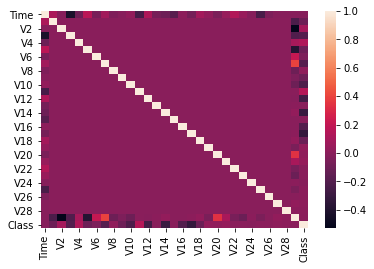

In [81]:
sns.heatmap(credit_card.corr())

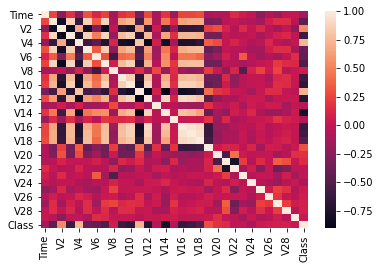

In [79]:
sns.heatmap(df.corr())

In [82]:
outlier_fraction=(df[df["Class"]==1]["Class"].count())/len(df)
print(outlier_fraction)

0.5


In [115]:
clf=IsolationForest(contamination=outlier_fraction,max_samples=len(X_smote),random_state=0)
clf.fit(X_smote)
y_pred=clf.predict(X_smote)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
print(accuracy_score(y_smote,y_pred))

0.8095107201759209


In [116]:
print(classification_report(y_smote,y_pred,target_names=["Genuine","Fraud"]))

              precision    recall  f1-score   support

     Genuine       0.81      0.81      0.81    283764
       Fraud       0.81      0.81      0.81    283764

    accuracy                           0.81    567528
   macro avg       0.81      0.81      0.81    567528
weighted avg       0.81      0.81      0.81    567528



In [117]:
clf=RandomForestClassifier(max_depth=5,random_state=0)
clf.fit(X_smote,y_smote)
y_pred_rand = clf.predict(X_smote)
print(accuracy_score(y_smote,y_pred_rand))

0.9689777420673518


In [118]:
print(classification_report(y_smote,y_pred_rand,target_names=["Genuine","Fraud"]))

              precision    recall  f1-score   support

     Genuine       0.95      0.99      0.97    283764
       Fraud       0.99      0.94      0.97    283764

    accuracy                           0.97    567528
   macro avg       0.97      0.97      0.97    567528
weighted avg       0.97      0.97      0.97    567528



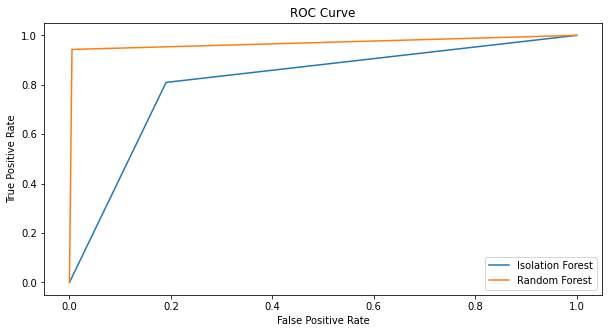

In [120]:
falpos,truepos,_=roc_curve(y_smote,y_pred)
falpos_r,truepos_r,_ = roc_curve(y_smote,y_pred_rand)
# plot the roc curve for the model
plt.plot(falpos,truepos,  label="Isolation Forest")
plt.plot(falpos_r,truepos_r,  label="Random Forest")


# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10,5)

# show the plot
plt.show()

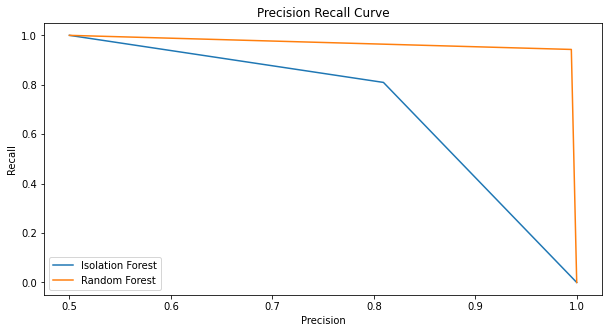

In [121]:
precision,recall,_=precision_recall_curve(y_smote,y_pred)
precision_r,recall_r,_= precision_recall_curve(y_smote,y_pred_rand)
# plot the roc curve for the model
plt.plot(precision,recall,  label="Isolation Forest")
plt.plot(precision_r,recall_r,  label="Random Forest")


# axis labels
plt.title('Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')

# show the legend
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10,5)

# show the plot
plt.show()